In order to set this up:
- you can use the install and setup in https://github.com/oskarkleincentre/MachineLearningInAstronomy
- you will also need the code for the figures from https://github.com/rbiswas4/astroML_figures/tree/chap_9_figs_current
- Another pretty good resource (Data Science Handbook, or sci-kit learn tutorials)

In [2]:
%matplotlib inline
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
sns.set_style('darkgrid')
sns.set_context('talk')

In [5]:
import astroML
import sklearn
print(astroML.__version__)
print(sklearn.__version__)
print(sns.__version__)
print(pd.__version__)

0.4-git
0.19.0
0.8.1
0.22.0


### Concepts 

In [12]:
cd /Users/rbiswas/soft/astroML_figures/book_figures/chapter9/

/Users/rbiswas/soft/astroML_figures/book_figures/chapter9


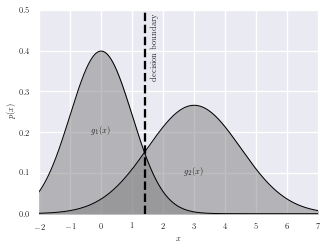

In [13]:
run fig_bayes_DB.py

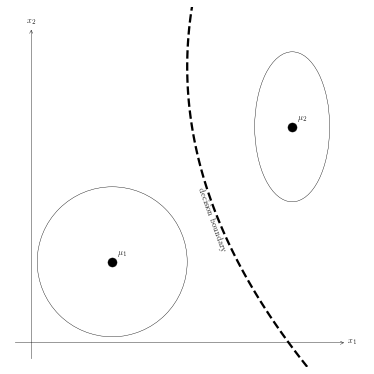

In [14]:
run fig_bayes_DB_2d.py

## Data

In [8]:
from astroML.datasets import fetch_rrlyrae_combined

In [9]:
bp = list((sns.color_palette('dark')[0], sns.color_palette('dark')[2]))
#sns.palplot(list((sns.color_palette('bright')[0], sns.color_palette('bright')[2])))

In [ ]:
X, y = fetch_rrlyrae_combined()
data = pd.DataFrame(X, columns=['u-g', 'g-r', 'r-i', 'i-z'])
data['value'] = y

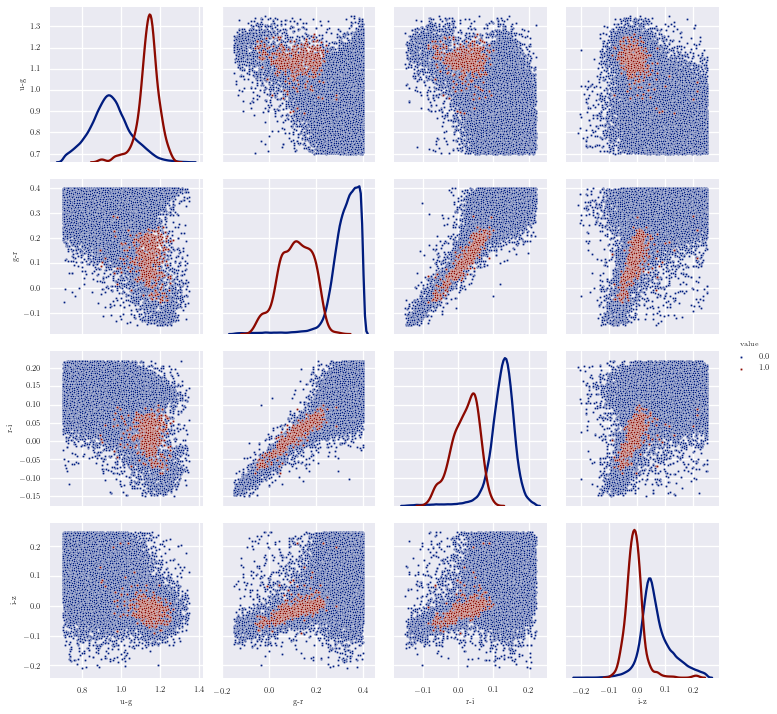

In [10]:
#sns.set_style('whitegrid')
binarypalette = sns.color_palette(list(('red', 'blue')), desat=None)
sns.pairplot(data, hue='value', vars=['u-g', 'g-r', 'r-i', 'i-z'], plot_kws=dict(s=6.),
             kind='scatter', diag_kind='kde', palette=bp)

What do you notice about the data?

## Methods

200 (200, 2)


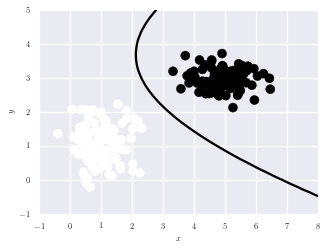

In [6]:
run fig_simple_naivebayes.py

completeness [0.48175182 0.68613139 0.81021898 0.87591241]
contamination [0.85201794 0.79295154 0.80143113 0.79020979]


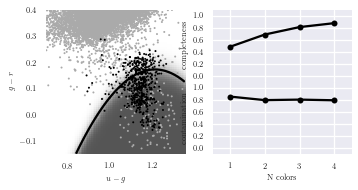

In [9]:
run fig_rrlyrae_naivebayes.py

/Users/rbiswas/astroml_miniconda3/envs/astroml/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'ls'
  s)


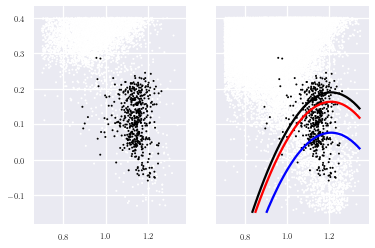

In [30]:
fig, ax = plt.subplots(1,2, sharey=True, squeeze=True)
ax[0].scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
ax[1].scatter(X[:, 1], X[:, 0], c=y[:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 81),
                     np.linspace(ylim[0], ylim[1], 71))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

ax[1].contour(xx, yy, Z, [0.3, 0.6, 0.99], colors=['k', 'r', 'b'], ls=['solid', 'dashed', 'dotted'])



@pickle_results: using precomputed results from 'GMMbayes_rrlyrae.pkl'
completeness [[0.48175182 0.68613139 0.73722628 0.76642336]
 [0.         0.17518248 0.40145985 0.68613139]]
contamination [[0.85201794 0.79249448 0.77654867 0.76190476]
 [0.         0.25       0.15384615 0.23577236]]


/Users/rbiswas/astroml_miniconda3/envs/astroml/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/rbiswas/astroml_miniconda3/envs/astroml/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


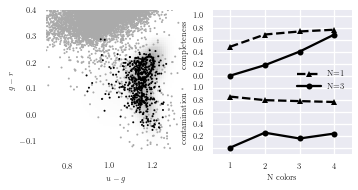

<Figure size 432x288 with 0 Axes>

In [33]:
run fig_rrlyrae_GMMbayes.py

### Using sci-kit learn directly (and comparing to the code in the astroML figure)

In [40]:
import sklearn

In [42]:
xx = sklearn.model_selection.train_test_split(X, y, test_size=0.75, train_size=0.25)

In [45]:
xx[0].shape

(23285, 4)

In [53]:
np.shape(xx)

(71, 81)

In [46]:
xx[1].shape

(69856, 4)

In [63]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)

In [64]:
len(X_train) / len(X)

0.7499919476922086

In [65]:
np.shape(xx[3])

(69856,)

In [75]:
x_train, y_train = sklearn.utils.shuffle(X_train, y_train)

In [76]:
len(X_train)

69855

In [108]:
gnb = sklearn.naive_bayes.GaussianNB()

In [109]:
#gnb.fit(X, y)

In [110]:
gnb.fit(x_train[:15000], y_train[:15000])

GaussianNB(priors=None)

In [111]:
y_pred = gnb.predict(X_test)

In [112]:
from astroML.utils import completeness_contamination

In [113]:
completeness, contamination = completeness_contamination(y_pred, y_test)

In [114]:
completeness

array(0.88321168)

In [115]:
contamination

array(0.78956522)

Comment: `sklearn` has improved since 2012. Useful to look at `sklearn` facilities to do many of the things done in `astroML`

completeness [0.48175182 0.68613139 0.81021898 0.87591241]
contamination [0.85201794 0.79295154 0.80143113 0.79020979]


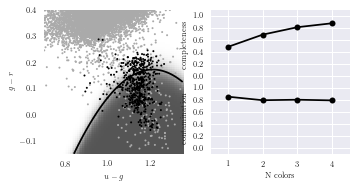

In [73]:
run fig_rrlyrae_naivebayes.py

completeness [0.48175182 0.67153285 0.67153285 0.67153285]
contamination [0.85300668 0.80590717 0.80467091 0.80590717]


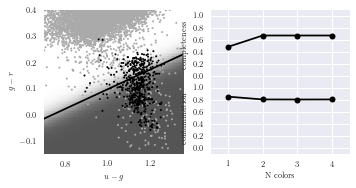

In [119]:
run fig_rrlyrae_lda.py

completeness [0.48175182 0.68613139 0.73722628 0.78832117]
contamination [0.85201794 0.79249448 0.77555556 0.75675676]


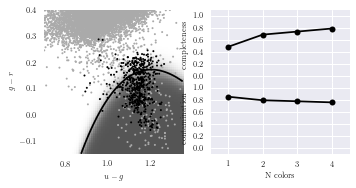

In [121]:
run fig_rrlyrae_qda.py

@pickle_results: using precomputed results from 'GMMbayes_rrlyrae.pkl'
completeness [[0.48175182 0.68613139 0.73722628 0.76642336]
 [0.         0.17518248 0.40145985 0.68613139]]
contamination [[0.85201794 0.79249448 0.77654867 0.76190476]
 [0.         0.25       0.15384615 0.23577236]]


/Users/rbiswas/astroml_miniconda3/envs/astroml/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/rbiswas/astroml_miniconda3/envs/astroml/lib/python3.5/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


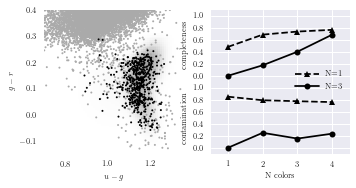

In [122]:
run fig_rrlyrae_GMMbayes.py

completeness [[0.22627737 0.3649635  0.46715328 0.54014599]
 [0.00729927 0.23357664 0.40145985 0.53284672]]
contamination [[0.78014184 0.53271028 0.44347826 0.41732283]
 [0.875      0.44827586 0.24657534 0.23958333]]


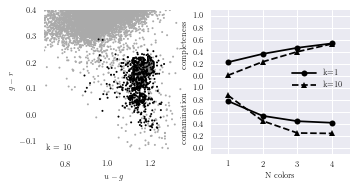

In [123]:
run fig_rrlyrae_knn.py

completeness [0.98540146 1.         1.         1.        ]
contamination [0.88588335 0.84143519 0.8416185  0.84069767]
[-9.85508091]
[[-24.38288352  14.65695219]]


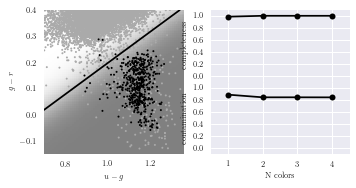

In [141]:
run fig_rrlyrae_logreg.py

@pickle_results: computing results and saving to 'SVM_rrlyrae.pkl'
new code
4 23286
completeness [0.99270073 1.         1.         1.        ]
contamination [0.90014684 0.85347594 0.85347594 0.85471898]


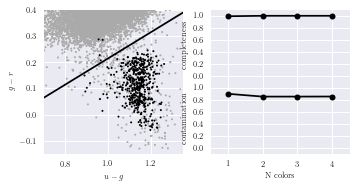

In [132]:
run fig_rrlyrae_svm.py

@pickle_results: computing results and saving to 'kernelSVM_rrlyrae.pkl'
completeness [1. 1. 1. 1.]
contamination [0.90108303 0.83901293 0.83573141 0.81561238]


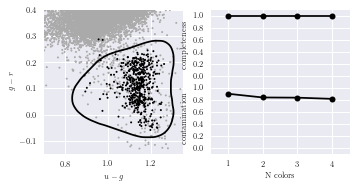

In [134]:
run fig_rrlyrae_kernelsvm.py

completeness [[0.00729927 0.3649635  0.29927007 0.62773723]
 [0.02189781 0.31386861 0.51824818 0.57664234]]
contamination [[0.66666667 0.375      0.31666667 0.31746032]
 [0.625      0.48809524 0.37719298 0.3875969 ]]


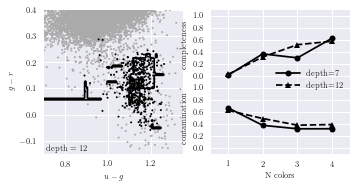

In [152]:
run fig_rrlyrae_decisiontree.py

/Users/rbiswas/soft/astroML_figures/book_figures/chapter9/fig_rrlyrae_forest.py:141: RuntimeWarning: invalid value encountered in true_divide
  contamination = fp * 1. / (tp + fp)


completeness [[0.         0.         0.         0.0729927 ]
 [0.         0.26277372 0.40145985 0.44525547]]
contamination [[0.         0.         0.         0.23076923]
 [1.         0.47058824 0.25675676 0.25609756]]


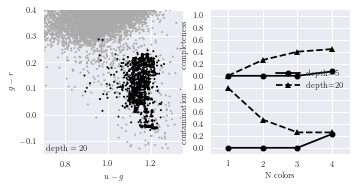

In [151]:
run fig_rrlyrae_forest.py

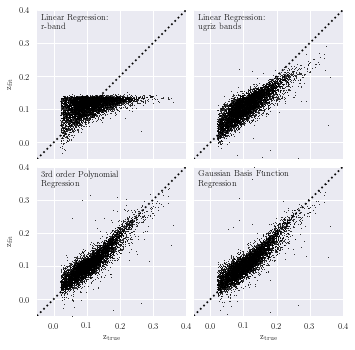

In [153]:
run fig_photoz_basic.py

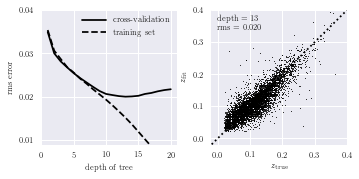

In [154]:
run fig_photoz_tree.py

@pickle_results: computing results and saving to 'photoz_boosting.pkl'


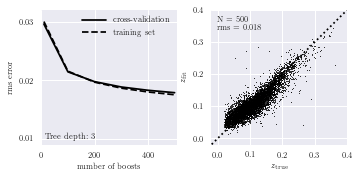

In [155]:
run fig_photoz_boosting.py

@pickle_results: computing results and saving to 'photoz_forest.pkl'


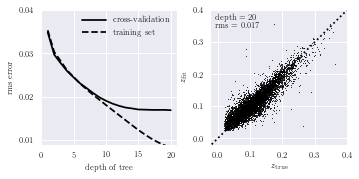

<Figure size 432x288 with 0 Axes>

In [186]:
run fig_photoz_forest.py

one tree: rms = 0.027329080713174258
ten trees: rms = 0.022938328296690645


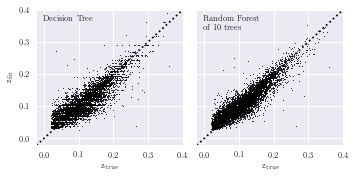

In [187]:
run fig_photoz_bagging.py

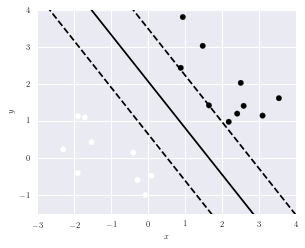

In [191]:
run fig_svm_diagram.py

In [ ]:
DecisionTreeClassifier()

----------------------------------------------------------------
partial training set: (69509 non-variable, 346 RR Lyrae)
positive = RR Lyrae, negative = non-variable
false positives: 52 (41.9%)
false negatives: 65 (0.3%)
----------------------------------------------------------------
full training set: (69509 non-variables, 346 RR Lyraes)
positive = RR Lyrae, negative = non-variables
false positives: 52 (41.9%)
false negatives: 65 (0.3%)


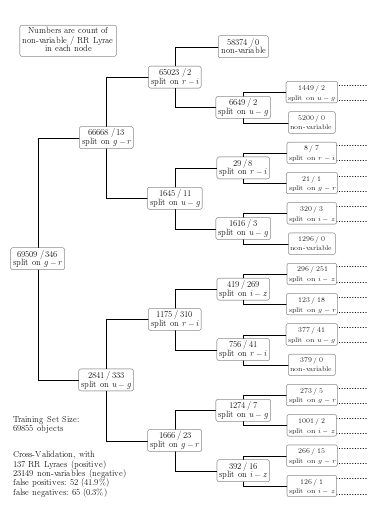

In [192]:
run fig_rrlyrae_treevis.py

In [20]:
import warnings

In [21]:
warnings.filterwarnings('ignore')

GaussianNB
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier
GMMBayes
['GaussianNB', 'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis', 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'GMMBayes']
[array([0.49234784, 1.        , 0.13993445, ..., 0.01432024, 0.25653135,
       0.6197098 ]), array([3.31173484e-01, 1.23932005e-07, 3.55808818e-01, ...,
       3.43295470e-02, 4.22656770e-03, 9.40538069e-02]), array([0.99993407, 1.        , 0.87573134, ..., 0.01930874, 0.00674061,
       0.36269218]), array([3.93214244e-01, 1.60974047e-11, 3.19655451e-01, ...,
       3.94943754e-03, 1.61179772e-04, 3.97868784e-02]), array([1., 1., 1., ..., 0., 0., 0.]), array([1.        , 1.        , 1.        , ..., 0.00148204, 0.        ,
       0.04105572]), array([0.96971962, 1.        , 0.7950347 , ..., 0.123241  , 0.00174746,
       0.08385211])]


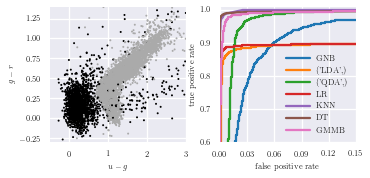

In [22]:
run fig_star_quasar_ROC.py